유방암 진단 데이터셋을 활용하여, 단층 퍼셉트론으로 이진 분류 모델을 구현한다.    
입력은 10개 feature, 출력은 1개의 확률값.   
Sigmoid 함수를 통해 확률 기반 분류를 수행한다.   

## 0. 필요한 라이브러리 import

In [18]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer

## 1. 데이터 불러오기

In [19]:
cancer = load_breast_cancer()       # 유방암 데이터셋을 bunch 객체 방식으로 반환

cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

In [20]:
cancer.DESCR  # 데이터 셋의 상세 설명

'.. _breast_cancer_dataset:\n\nBreast cancer Wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 

In [21]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


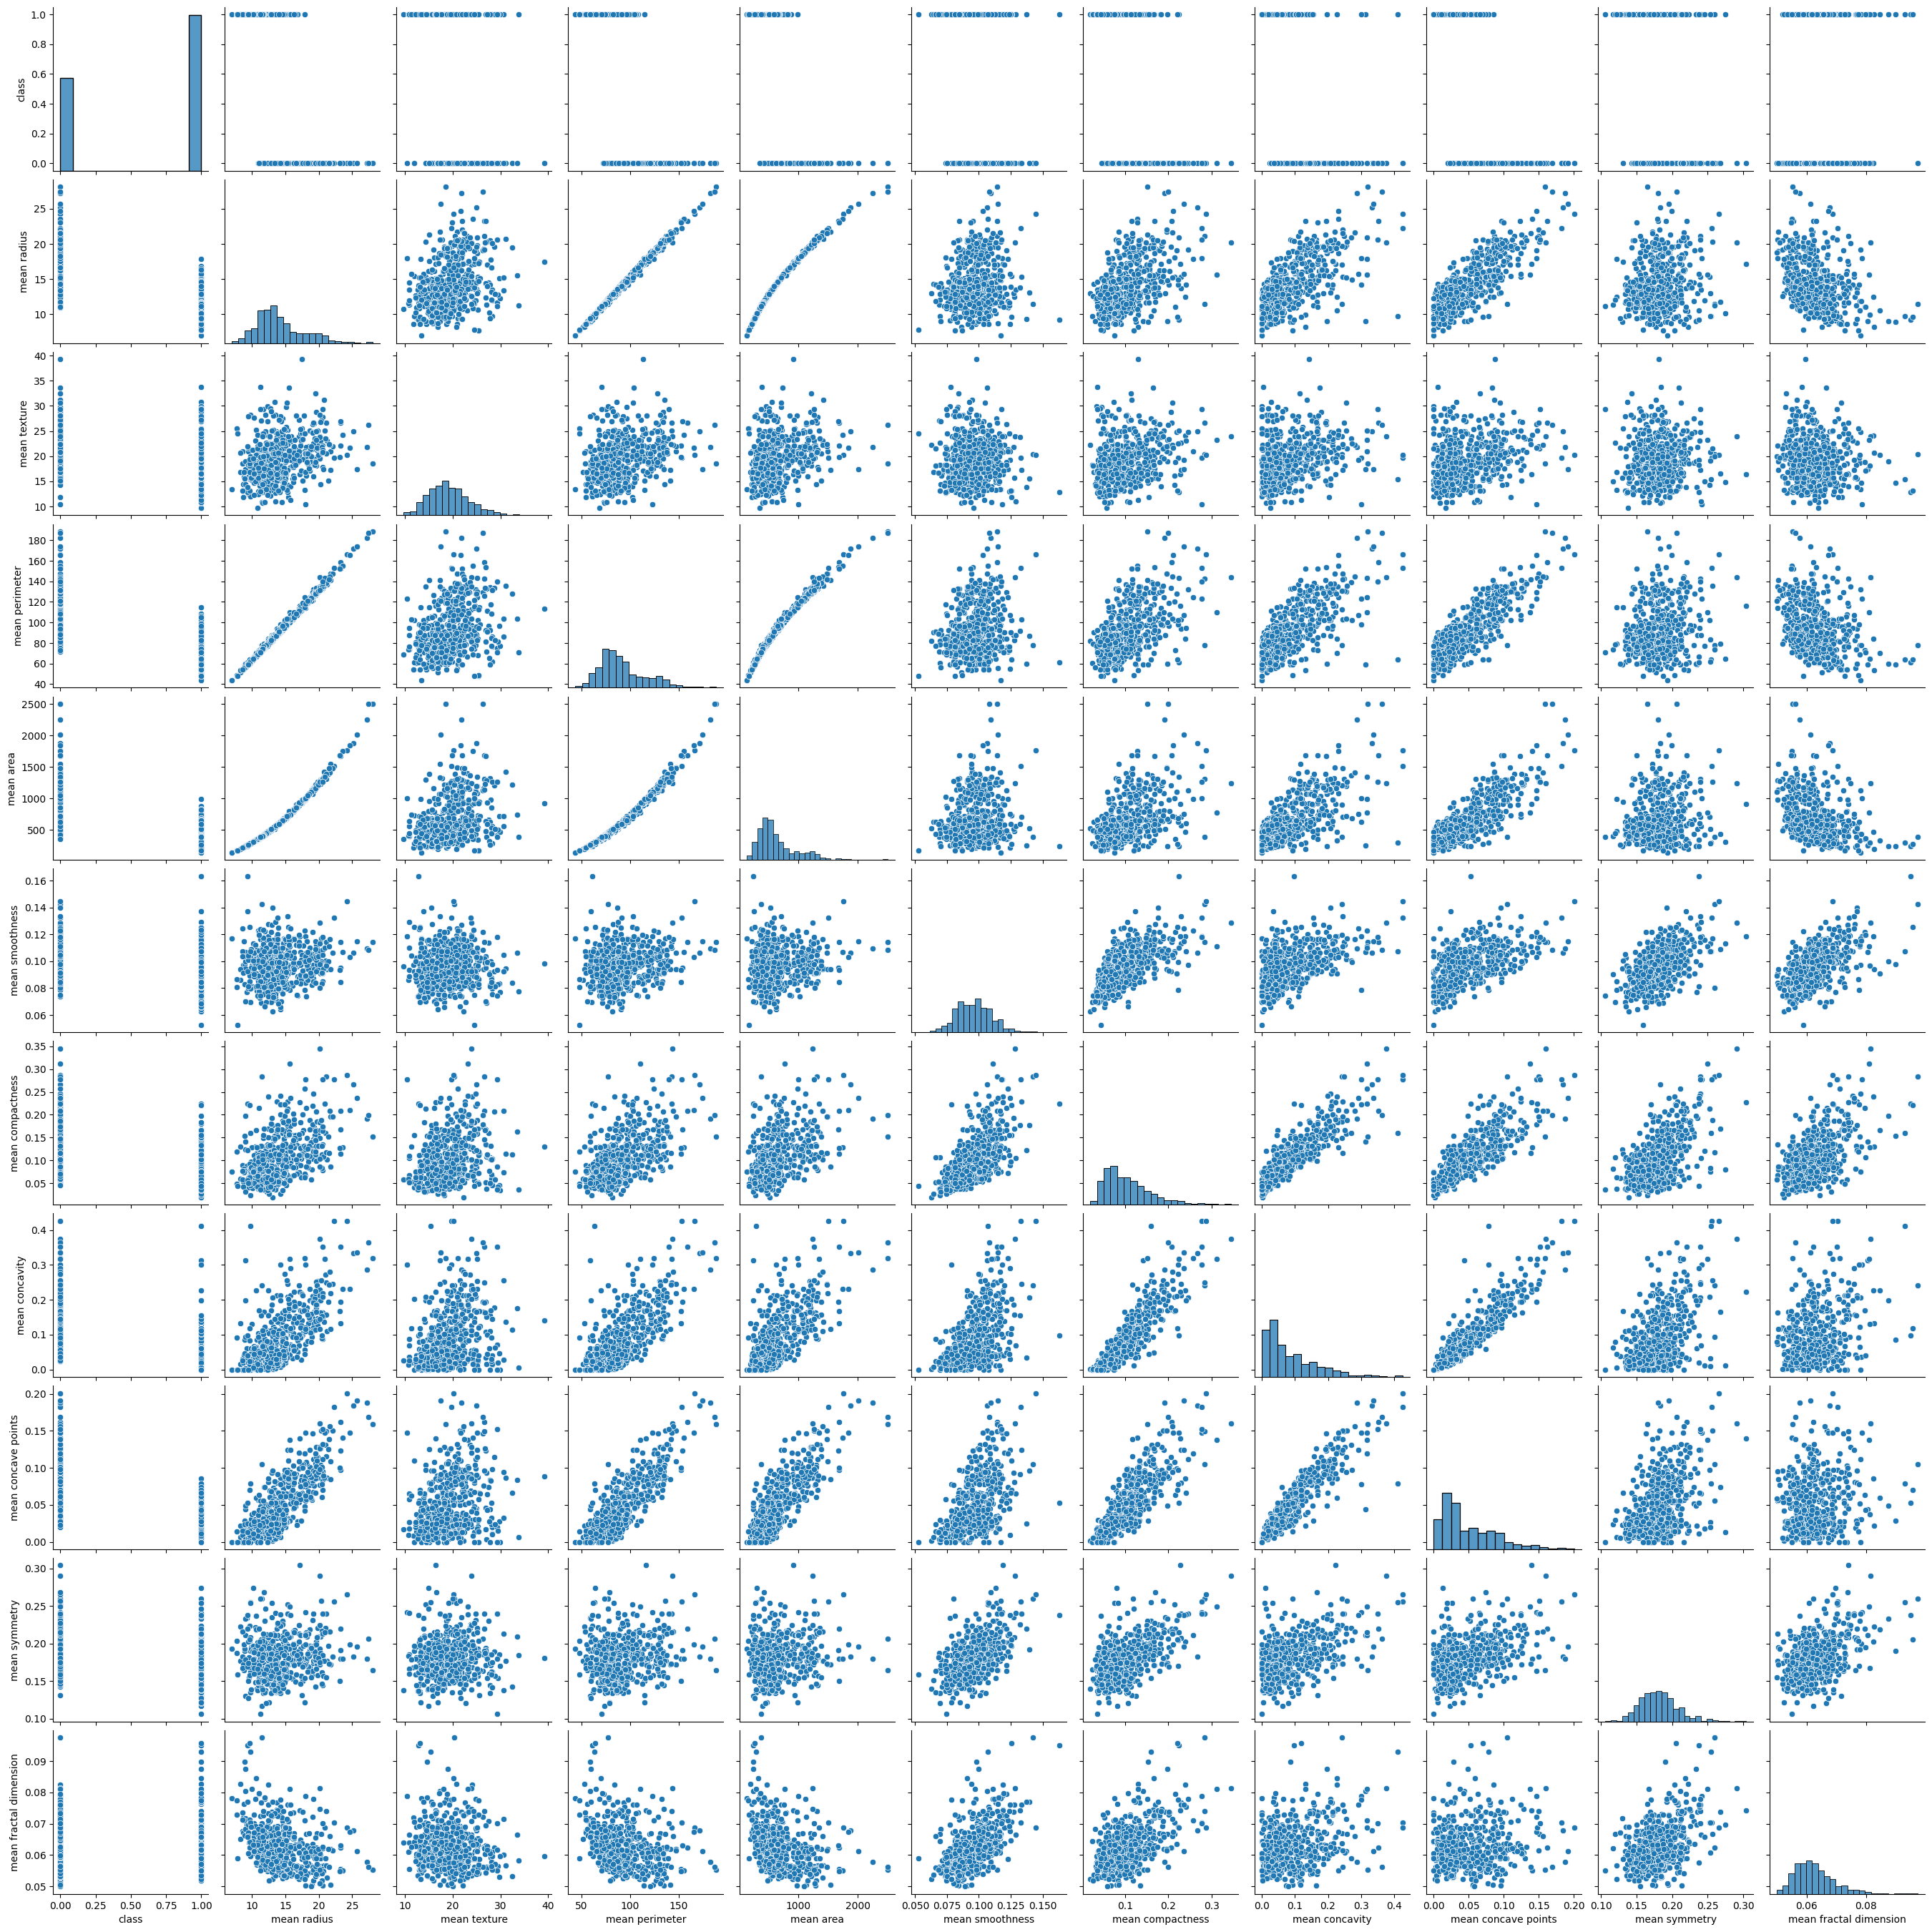

In [22]:
# 평균 특성들로 구성된 페어플롯 (mean으로 시작하는 특성)

sns.pairplot(df[['class']+list(df.columns[:10])])
plt.show()

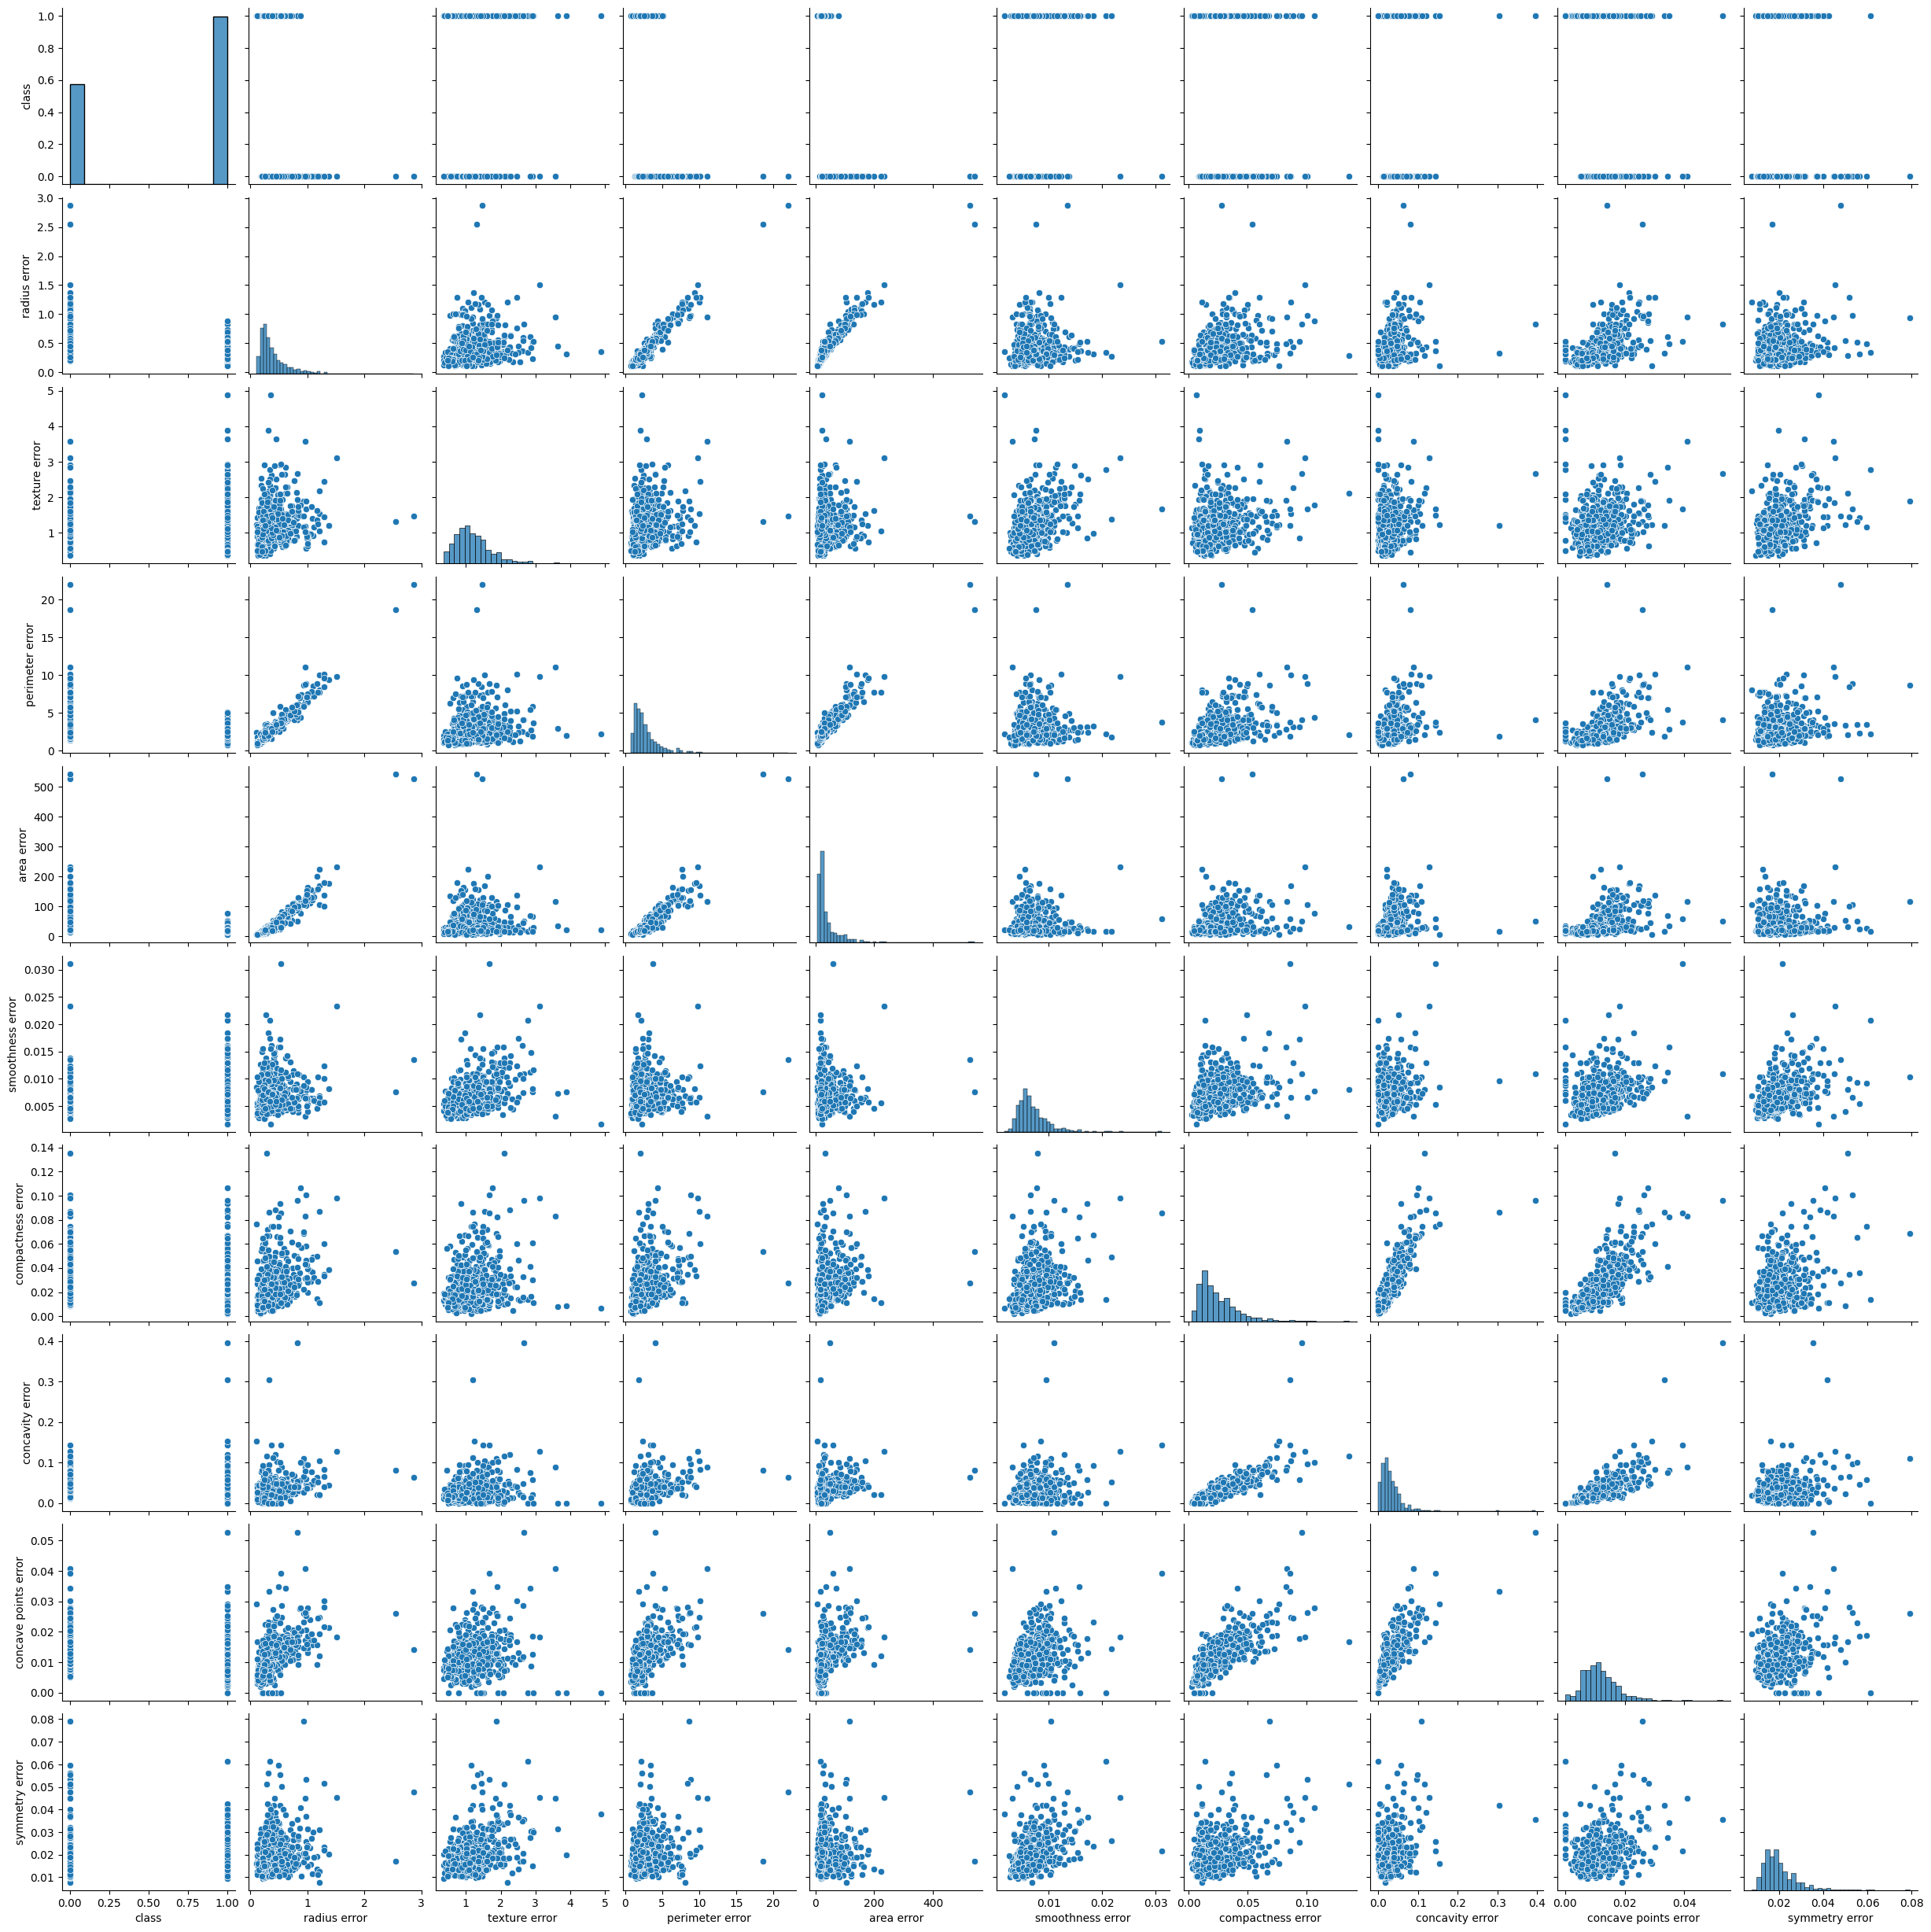

In [23]:
# 표준편차 특성들로 구성된 페어플롯 (error로 끝나는 특성)
sns.pairplot(df[['class'] + list(df.columns[10:19])])
plt.show()

In [24]:
cols = ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean concave points', 'worst radius', 'worst texture','worst smoothness',
       'worst compactness', 'worst concave points','class']

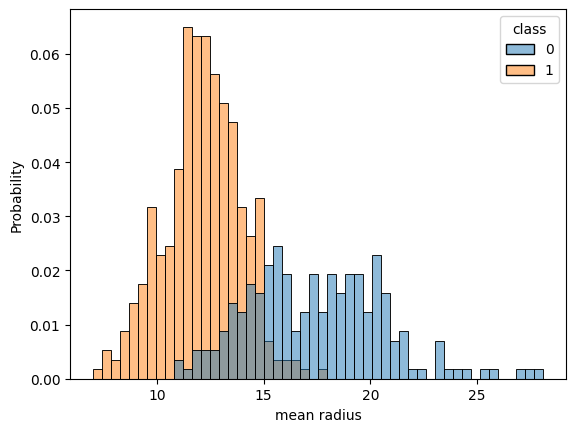

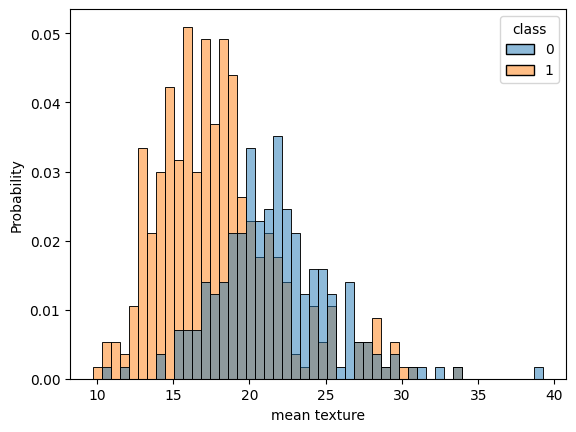

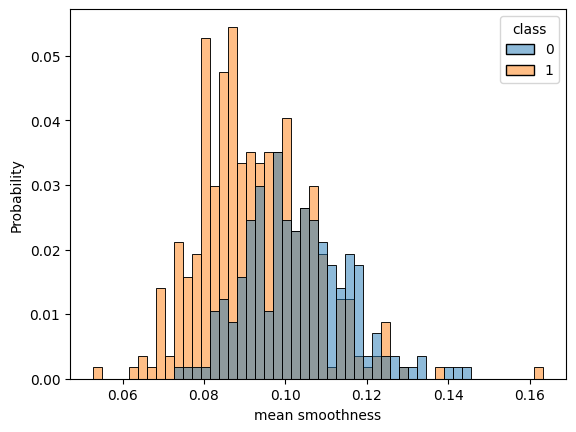

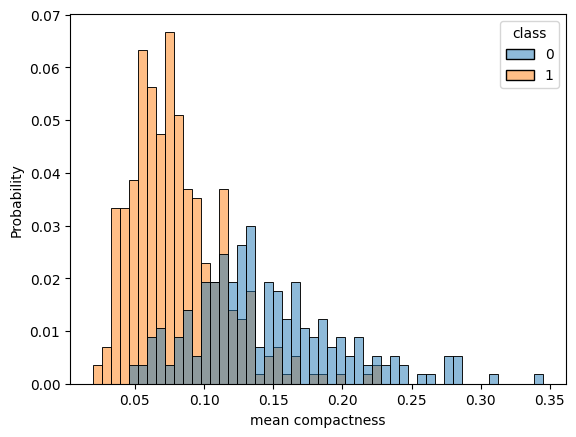

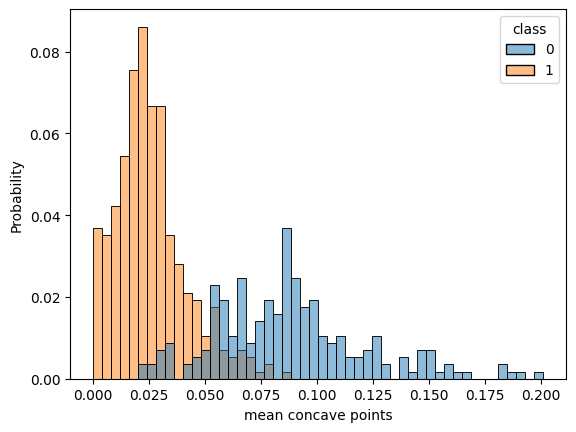

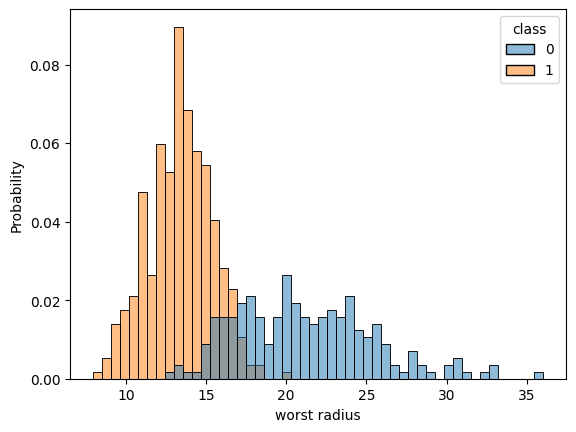

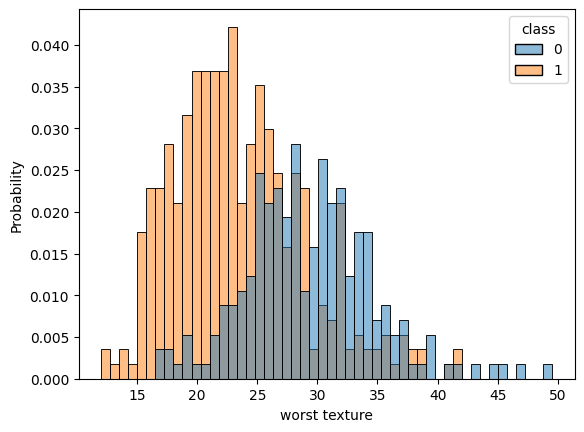

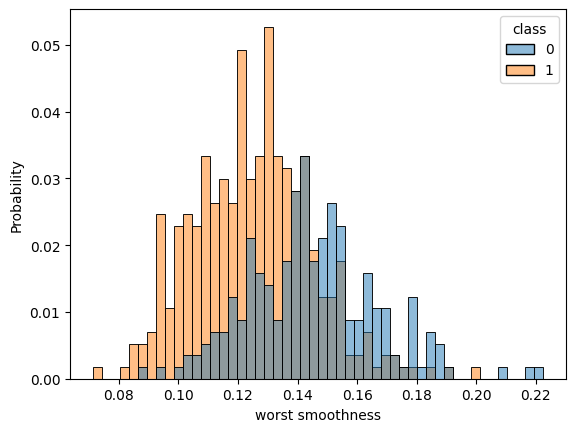

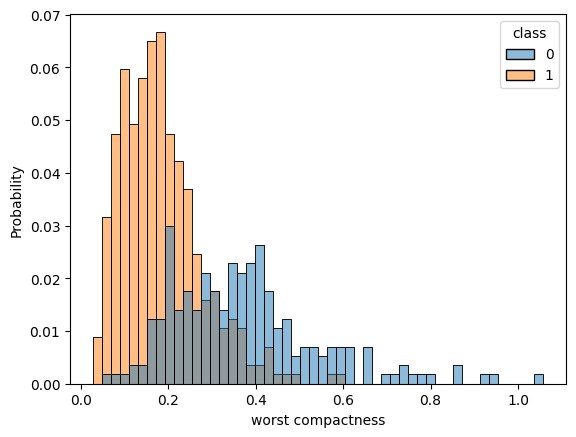

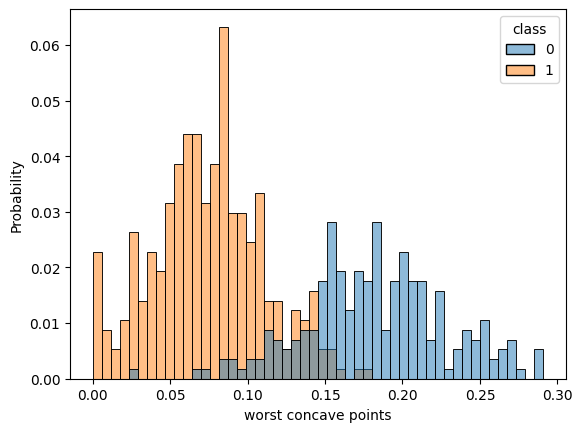

In [27]:
for c in cols[:-1]:                 # 마지막 컬럼 (class) 제외한 컬럼 
    sns.histplot(   
        df,
        x=c,                        # 현재 특성 컬럼이 x 축
        hue = cols[-1],             # 마지막 컬럼(class) 기준으로 색상 구분
        bins = 50,                  # 히스토그램 구간 50개
        stat = 'probability'       # 빈도를 확률(비율)로 정규화하여 비교
    )

    plt.show()

## 2. Pytorch 를 사용해서 모델을 학습하기


In [28]:
import torch                        # 텐서 연산
import torch.nn as nn               # 신경망 레이어와 모델
import torch.nn.functional as F     # 활성화 함수, 손실함수 등 함수
import torch.optim as optim         # SGD, Adam 등 최적화 알고리즘
data = torch.from_numpy(df[cols].values).float()    # 해당 컬럼값을 Numpy 배열 -> Pytorch

In [29]:
data = torch.from_numpy(df[cols].values).float()    #해당 컬럼값을 Numpy배열 -> pytorch Tensor로 변환

data.size()

torch.Size([569, 11])

In [30]:
# 입력값(x)와 정답값(y) 를 분리 (범위형으로 자른다)
x = data[:,:-1]
y = data[:,-1:]

print(x.shape,y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [ ]:
# 학습 관련 하이퍼파라미터 설정

n_epochs = 200000       
learning_rate = 1e-2
print_interval = 10000      # 학습 진행상황 출력 간격

In [33]:
# nn.Module을 상속받아 입려 -> 선형 변환 -> 활성화 함수로 구성된 클래스
class MyModel(nn.Module):

    def __init__(self, input_dim, output_dim ):
        self.input_dim = input_dim              # 입력 특성의 차원 수
        self.output_dim = output_dim            # 출력 차원(노드 수) 수

        super().__init__()                      # nn.module 초기화() : nn.Module 에서 내부적으로 관리하는 기능들을 초기화하여 수동 상태 관리한다

        self.linear = nn.Linear(input_dim, output_dim)  # 입력 -> 출력으로 선형 변환
        self.act = nn.Sigmoid()                         # 출력값을 0~1 사이의 범위로 변환하느 활성화 함수

    def forward(self, x):
        y = self.act(self.linear(x))    #선형 변환 후 Sigmoid 활성화 적용
        
        return y    # 최종 예측 결과 반환
        

In [34]:
model = MyModel(
    input_dim = x.size(-1),     # 입력 데이터의 마지막 차원 = 입력 노드 수
    output_dim = y.size(-1)     # 출력 데이터의 마지막 차원 = 출력 노드 수
)

crit = nn.BCELoss()             # 이진분류 Sigmoid -> BCE Loss

optimizer = optim.SGD(
    model.parameters(),         # 학습 대상 파라미터 (가중치, 편향)
    lr = learning_rate          # 경사하강법에서 사용할 학습률 
)

In [ ]:
# 학습 루프 
for i in range(n_epochs):
    y_hat = model(x)            # 순전파 : 입력 x에 대한 예측값 계산
    loss = crit(y_hat, y)       # 손실 함수 : 예측값 과 실제값을 비교해 손실 계산

    optimizer.zero_grad()       # 최적화 함수 : 이진 반복의 누적된 기울기 초기화
    loss.backward()             # 손실 함수 : 손실에 대한 파라미터 기울기 계산 (역전파)

    optimizer.step()            # 최적화 함수 : 계산된 기울기를 가지고 파라미터 업데이트 
    
    # 지정된 간격마다 출력
    if (i + 1) % print_interval == 0 :
        print(f"Epoch {i+1}: loss = {loss}")

Epoch 10000: loss = 0.11480896919965744
Epoch 20000: loss = 0.11384642869234085
Epoch 30000: loss = 0.11294519156217575
Epoch 40000: loss = 0.11212248355150223
Epoch 50000: loss = 0.11134591698646545
Epoch 60000: loss = 0.11063092201948166
Epoch 70000: loss = 0.10995018482208252
Epoch 80000: loss = 0.10932528227567673
Epoch 90000: loss = 0.1087242066860199
Epoch 100000: loss = 0.10816799104213715
Epoch 110000: loss = 0.10764146596193314
Epoch 120000: loss = 0.10713011771440506
Epoch 130000: loss = 0.10665930807590485
Epoch 140000: loss = 0.1062132716178894
Epoch 150000: loss = 0.10577867180109024
Epoch 160000: loss = 0.10536077618598938
Epoch 170000: loss = 0.10497817397117615
Epoch 180000: loss = 0.1046067327260971
Epoch 190000: loss = 0.1042441576719284
Epoch 200000: loss = 0.10388920456171036


In [39]:
correct_cnt = (y == (y_hat > .5)).sum( )  # 예측확률이 0.5를 넘으면 1로 판단하고 실제값과 비교 후에 맞은 갯수 계산 
total_cnt = float(y.size(0))

print(f"Accuracy: {(correct_cnt/total_cnt) * 100:.4f}%")

Accuracy: 96.3093%


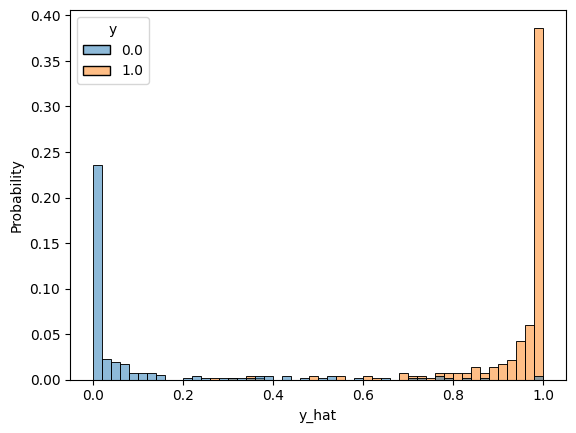

In [42]:
df = pd.DataFrame(
    # 정답(y) 와 예측값(y_hat)을 열 방향으로 합치고, 텐서(그래프 제거) 를 Numpy 배열로 반환 후 pandas에 전달
    torch.cat([y, y_hat],dim = 1 ).detach().numpy(),
    columns=["y","y_hat"])

sns.histplot(
    df, 
    x="y_hat", 
    hue = 'y', 
    bins = 50, 
    stat = 'probability'
)

plt.show()